## Part 1: Dealing with Class Imbalance

### SMOTE: Synthetic Minority Oversampling Technique

Our first example shows how we can use SMOTE on a un-balanced dataset to generate a new re-balanced dataset.

### Alert:
1. This can be slow when data is large.
1. It can work on binary or multiclass classification data.

### Imbalanced Learn Library
See [Imbalanced-Learn documentation](https://imbalanced-learn.org/stable/).

In [1]:
import imblearn
from sklearn.datasets import make_classification
import numpy as np
import warnings
warnings.filterwarnings('ignore')

We use the following code snippet to generate a classification dataset with an imbalanced target, where the degree of imbalance is set by the `weights` argument below.

In [2]:
%%time
from imblearn.over_sampling import SMOTE 
sample_size = 1000
X, y = make_classification(n_classes = 3, 
                           class_sep = 2, 
                           weights = [0.05, 0.1, 0.85], 
                           n_informative = 3, 
                           n_redundant = 1, 
                           flip_y = 0, 
                           n_features = 20, 
                           n_clusters_per_class = 1, 
                           n_samples = sample_size, 
                           random_state = 10)

CPU times: user 3 ms, sys: 0 ns, total: 3 ms
Wall time: 2.44 ms


We can use `np.unique` to get counts for each class.

In [3]:
np.unique(y, return_counts = True)

(array([0, 1, 2]), array([ 50, 100, 850]))

We now use SMOTE to rebalance the dataset.

In [5]:
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_sample(X, y)

### Exercise

1. The new dataset should show equal counts for each class. Verify that that is the case.
1. Return to the above data and increase the sample size to `10**6` (one million). Find out how long it takes to generate the data, and how long it takes to run `SMOTE`.



In [6]:
np.unique(y_res, return_counts = True)

(array([0, 1, 2]), array([850, 850, 850]))

In [7]:
sample_size = 10**2
X, y = make_classification(n_classes = 3, 
                           class_sep = 2, 
                           weights = [1/3, 1/3, 1/3], 
                           n_informative = 3, 
                           n_redundant = 1, 
                           flip_y = 0, 
                           n_features = 20, 
                           n_clusters_per_class = 1, 
                           n_samples = sample_size, 
                           random_state = 10)

In [8]:
np.unique(y, return_counts = True)

(array([0, 1, 2]), array([333334, 333333, 333333]))

In [ ]:
sm = SMOTE(random_state = 37)
X_res, y_res = sm.fit_sample(X, y)

### End of exercise

## Part 2: Binary classification of Boston housing data

The Boston dataset has housing data including median price. We create a binary label to flag the most expensive houses and build a classifier to predict the likelihood of a house being expensive.

In [5]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import numpy as np

In [6]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Note that the `boston` object above is a Python dictionary, which include the features `boston['data']`, the target which is the housing price in `boston['target']`, and additional metadata, such a a description.

### Exercise

Print a description of the `boston` dataset and read what each column represents.

### End of exercise

Let's visualize the first few rows of the `boston` data.

In [12]:
boston['data'][1:5]

array([[2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

As you can see this is not very pretty. The reason is that `boston` is a Python array, similar to a matrix. Of course, at the end of the day all tabular data is turned into an array so that we can do linear algebra with it, but for the sake of visualization this is not ideal. The solution is to take the raw array and turn it into a `DataFrame` using the `pandas` library, which was created for this purpose. It allows us to interact with the data in a more code-friendly and intuitive way.

In [13]:
df_boston = pd.DataFrame(boston['data'], columns = boston['feature_names'])
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


So `df_boston` is a `DataFrame` that represents the `boston['data']` array. In fact, if we needed to go back to the array, we can just type `df_boston.values`, but we rarely need to do that. Using `pandas` we can visualize, process, and summarize the data in an easier way than if we had to do it using `numpy` directly. Of course, `pandas` itself usese `numpy` to do this behind the scenes, but this is mostly hidden from us. This is why we say `pandas` is an **abstraction layer** on top of `numpy` so data scientists can do their most common tasks without having to use `numpy` directly.

### Exercise

1. As one example, recall that earlier in the notebook we used `np.unique(...)` to get counts. Use it to get counts for each unique value of the `RAD` column in `df_boston`, in other words `df_boston['RAD']`.

In [23]:
np.unique(df_boston['RAD'], return_counts = True)

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 24.]),
 array([ 20,  24,  38, 110, 115,  26,  17,  24, 132]))

1. Now turn the counts into percentages instead.

In [26]:
x = np.unique(df_boston['RAD'], return_counts = True)
x[1] / x[1].sum() * 100

array([ 3.95256917,  4.743083  ,  7.50988142, 21.73913043, 22.72727273,
        5.13833992,  3.35968379,  4.743083  , 26.08695652])

1. Since getting counts and turning them into percentages is such a common data-related task, there's got to be an easier way to do it. And there is. Search online to see if `pandas` offers a function for getting unique counts for a column in the data. Can you turn the counts into percentages?

In [28]:
df_boston['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [29]:
df_boston['RAD'].value_counts(normalize=True) * 100

24.0    26.086957
5.0     22.727273
4.0     21.739130
3.0      7.509881
6.0      5.138340
8.0      4.743083
2.0      4.743083
1.0      3.952569
7.0      3.359684
Name: RAD, dtype: float64

### End of exercise

Let's now visualize the target variable, housing price.

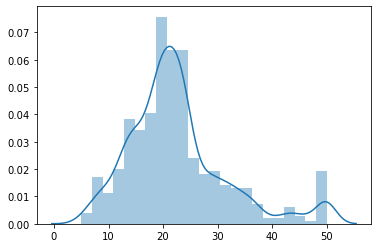

In [30]:
%matplotlib inline
ax = sns.distplot(boston['target'])

Say we're interested in training a classification algorithm to predict whether or not a house is worth 40k or more. So first we create a target column in the data that flags houses who sold for 40k or more.

In [31]:
df_boston['is_above_40k'] = boston['target'] >= 40

We start by splitting `df_boston` into a training data and a testing data. The easiest way to do this is using the `train_test_split` function.

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_boston.drop(columns = 'is_above_40k'), 
                                                    df_boston['is_above_40k'], 
                                                    test_size = 0.20, 
                                                    random_state = 0)

### Exercise

1. Find counts for `is_above_40k`.

In [53]:
df_boston['is_above_40k'].value_counts(normalize=True)

False    0.938735
True     0.061265
Name: is_above_40k, dtype: float64

1. Train a logistic regression classifier to predict when the price of a house is above 40k. Begin by loading the library as such: `from sklearn.linear_model import LogisticRegression`. Then create an instance of the algorithm and train it by invoking the `.fit(x_train, y_train)`.

In [49]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(x_train, y_train)

1. Once the model is trained, pass it the testing data to see if we get predictions back. To do so, we invoke the `.predict(x_test)` method. We can also invoke the `.predict_proba(x_test)` method if we wish to get the raw probabilites instead of the final predictions.

In [50]:
y_pred = clf.predict(x_test)

1. Get the accuracy of the model by loading `from sklearn.metrics import accuracy_score` and calling the `accuracy_score` function. What two arguments do we pass to this function to evaluate the model's accuracy?

In [52]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9607843137254902

1. Is accuracy a good metric for evaluating this model? Why or why not? To give some context, let's say you're a developer and want to predict house prices. You prefer to bid low and lose a bid than bid high for a house that's not worth it.

### End of exercise

Let's find some more useful evaluation metrics. The most direct metric to look at, is the confusion matrix.

In [59]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[93  2]
 [ 3  4]]


From the confusion matrix, we can derive accuracy, precision, recall, and the F1-score, which is a sort of average of precision and recall. We don't have time to get into all of them in detail, but [here](http://www.win-vector.com/blog/2009/11/i-dont-think-that-means-what-you-think-it-means-statistics-to-english-translation-part-1-accuracy-measures/) is an excellent article I recommend you read.

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97        95
        True       0.67      0.57      0.62         7

    accuracy                           0.95       102
   macro avg       0.82      0.78      0.79       102
weighted avg       0.95      0.95      0.95       102



One way to visually evaluate a binary classification model is using the ROC plot. By itself, it is not very useful, but by comparing the ROC plot of multiple models we can start seeing which models are better. The area under the ROC plot is called AUC (area under the curve) and the closer it is to 1, the better the model.

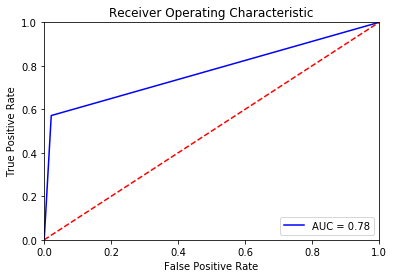

In [61]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Exercise

1. The `LogisticRegression` classifier we trained above has an argument called `class_weight`. Read the documentation to see what it does, then train a new model this time by providing the class weights. 
1. Does it change any of the results? In what way?

### End of exercise

## Part 3: Cross-validation for binary classification

In the last section, we trained a logistic regression classifier on the Boston housing data. In this section, we train the same logistic regression classifier, but use cross-validation to tune it.

In [62]:
from sklearn.linear_model import LogisticRegressionCV
clr = LogisticRegressionCV(cv = 5, random_state = 0, max_iter = 1000)
clr.fit(x_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=0, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [63]:
predictions = clr.predict(x_test)

In [64]:
np.unique(predictions, return_counts = True)

(array([False,  True]), array([96,  6]))

In [65]:
accuracy_score(predictions, y_test)

0.9509803921568627

In [66]:
metrics.confusion_matrix(y_test, predictions)

array([[93,  2],
       [ 3,  4]])

In [67]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.97      0.98      0.97        95
        True       0.67      0.57      0.62         7

    accuracy                           0.95       102
   macro avg       0.82      0.78      0.79       102
weighted avg       0.95      0.95      0.95       102



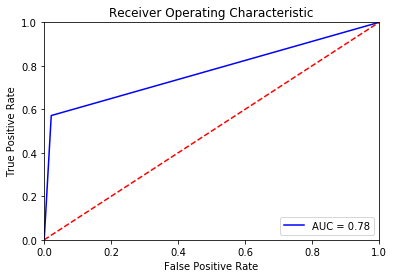

In [68]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Exercise

1. Does cross-validation seem to make a difference in the results we get?
1. Change the number of folds from 5 to 10 and train the CV model again? Notice any difference in performance? Note that *performance* here refers to the model's overall accuracy, based on your choice of metric, it does NOT refer to run-time? What was the cost of increasing the number of folds?

### End of exercise